# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- python-louvain 0.16
- networkx 2.8.3


In [1]:
import random
import networkx as nx
import numpy as np
from community import community_louvain, modularity
import matplotlib.pyplot as plt

In [2]:
n = 500 # number of nodes
k = 10 # connectivity
p = 0.1 # The probability of rewiring each edge

G = nx.watts_strogatz_graph(n, k, p)

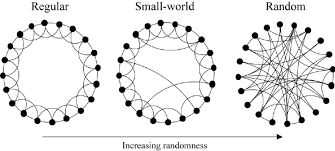

In [3]:
from IPython.display import Image
Image(filename='watts.png') 

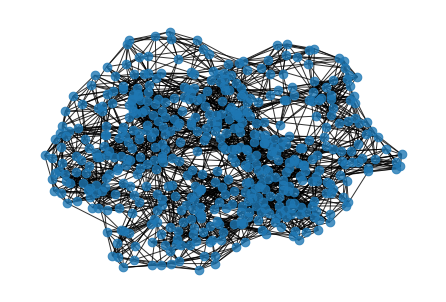

In [4]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [5]:
comms = community_louvain.best_partition(G)

Ver documentación en: https://python-louvain.readthedocs.io/en/latest/

In [6]:
from matplotlib import cm, colors
unique_coms = np.unique(list(comms.values()))
norm = colors.Normalize(vmin=min(unique_coms), vmax=max(unique_coms), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

In [7]:
node_cmap = [tuple((mapper.to_rgba(v)[0], mapper.to_rgba(v)[1], mapper.to_rgba(v)[2])) for _,v in comms.items()]

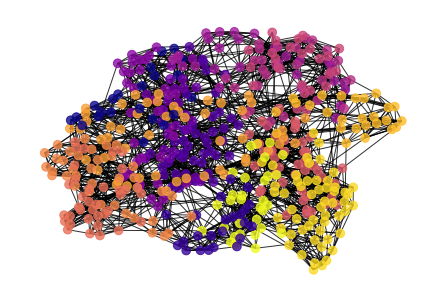

In [8]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

In [9]:
modularity(comms, G)

0.7646635999999999